In [1]:

import warnings
warnings.filterwarnings("ignore", category=UserWarning, module="torchvision.io.image")

import torch
import numpy as np


import torchvision
from torchvision import models

import torch.nn as nn

from skimage import io

import random
import time
import os.path


import matplotlib.pyplot as plt
from IPython.display import clear_output


from sklearn.metrics import accuracy_score
from skimage.transform import resize
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score


import torch.optim as optim
import torch.optim.lr_scheduler
import torch.nn.init
from torch.autograd import Variable


In [2]:
import sys
sys.path.append('../')
from src import *

In [3]:
data_folder = 'C:/dev/EuroSAT/'
root = os.path.join(data_folder, '2750/')

In [4]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [5]:
lr = 0.001             
milestones = [50,75,90] 
num_epochs = 100            

In [6]:
if __name__ == '__main__':
    torch.manual_seed(0)
    np.random.seed(0)
    torch.cuda.manual_seed(0)
    random.seed(0)
    
    print("pytorch version", torch.__version__)
    
    criteria = torch.nn.CrossEntropyLoss()
    net = Load_model(resnet_val=18, device = device)
    train_loader, val_loader = make_dataloaders(root, batch_size_val=128)
    
    net=net.to(device)
    
    optimizer = optim.Adam(net.parameters(), lr=lr, betas=(0.9, 0.999), eps=1e-08, weight_decay=0, amsgrad=False)
    scheduler = optim.lr_scheduler.MultiStepLR(optimizer, milestones=milestones, gamma=0.1)


pytorch version 2.1.2
Model Loaded


Iteration Number 16760 5.964307546615601 seconds
Train (epoch 100/100) [128/168 (76%)]	Loss: 0.060643	Accuracy: 0.984375	Learning Rate:1.0000000000000002e-06


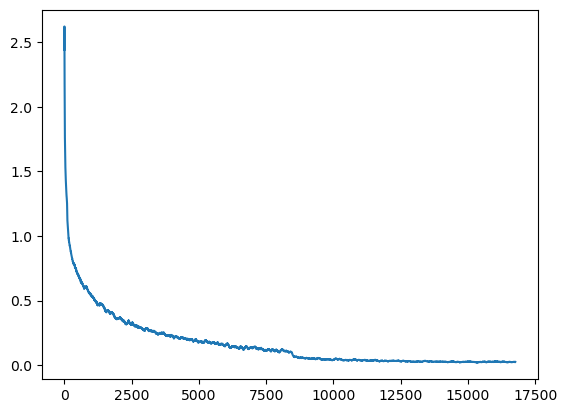

validation accuracy : 0.9557291666666666


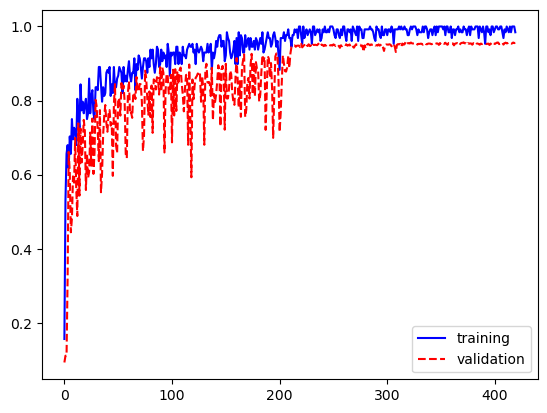

In [7]:
net = train(net, train_loader, val_loader, criteria, optimizer, num_epochs, scheduler, device = device, save_path='../models/')